In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
pizza = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\pizza_sales.csv")

In [30]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [6]:
#Getting more information about  the data
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [7]:
#shape of the dataset
pizza.shape

(48620, 12)

In [8]:
#finding if there are empty values
pizza.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
#looking for duplicate entries
pizza.duplicated().sum()

0

In [10]:
#number of each type of pizza ordered
pizza['pizza_name_id'].value_counts()

pizza_name_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

GENERAL STATISTICS

total pizza sold

In [11]:
#units by order quantity
pizza['quantity'].value_counts()

quantity
1.0    47693
2.0      903
3.0       21
4.0        3
Name: count, dtype: int64

In [12]:
#total units sold
total_pizza_ordered = pizza['quantity'].sum()
print("total ordered pizzas: ", total_pizza_ordered)

total ordered pizzas:  49574.0


Average number of pizzas per order

In [13]:
average_pizza_per_order= pizza['quantity'].sum() /total_pizza_ordered
print('average per order: ', average_pizza_per_order)

average per order:  1.0


Total Revenue

In [14]:
pizza['total_price'].sum()

817860.05





SALES ANALYSIS

In [15]:
#most orderd pizza throughout
pizza['pizza_name_id'].value_counts()[0:10]

pizza_name_id
big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
spicy_ital_l     1088
hawaiian_s       1001
southw_ckn_l      993
bbq_ckn_l         967
bbq_ckn_m         926
Name: count, dtype: int64

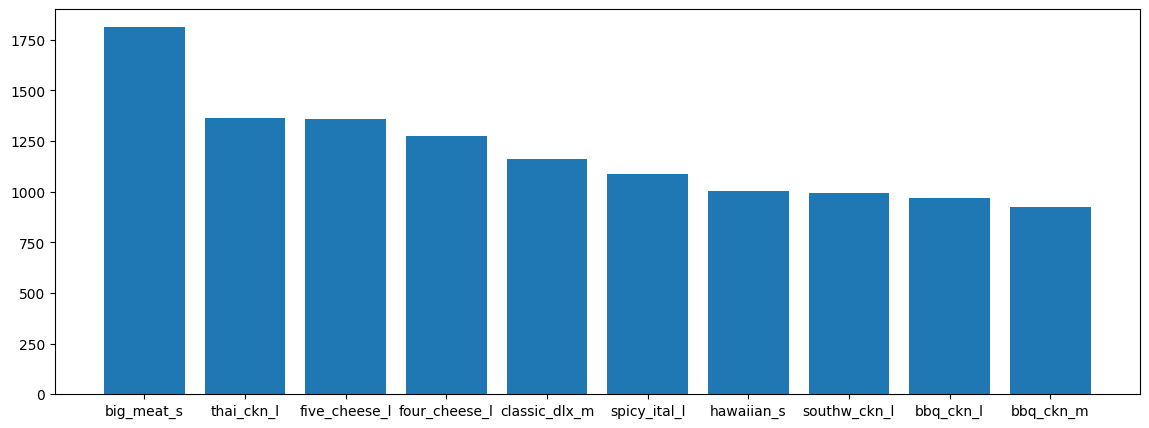

In [16]:
#barplot of the top 10
plt.figure(figsize=(14,5))
plt.bar(list(pizza['pizza_name_id'].value_counts()[0:10].keys()),list(pizza['pizza_name_id'].value_counts()[0:10]))
plt.show()

In [17]:
#average revenue of the top performing pizza
top_pizza_analysis = pizza.groupby('pizza_name').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_pizza=('unit_price', lambda x: (x * pizza['quantity']).sum())
).nlargest(5, 'revenue_per_pizza')
print("Average Unit Price and Revenue of Top 5 Pizzas:\n", top_pizza_analysis)

Average Unit Price and Revenue of Top 5 Pizzas:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


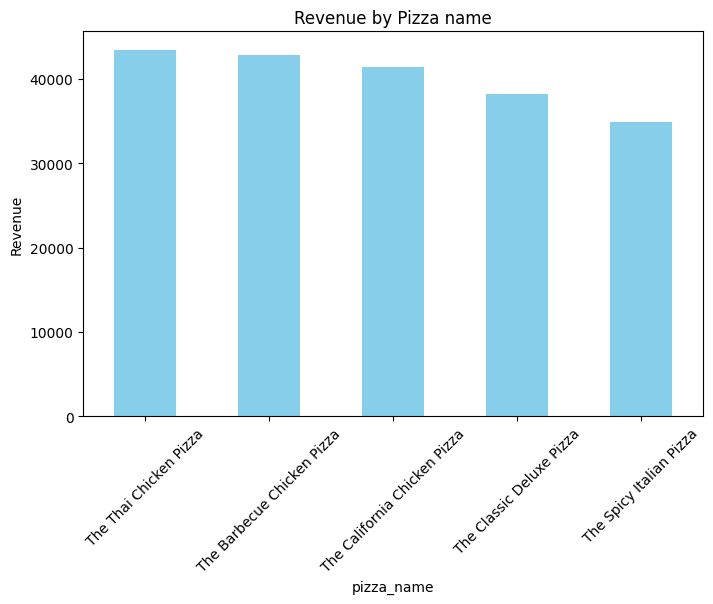

In [18]:
plt.figure(figsize=(8,5))
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar', color='skyblue')
plt.xlabel('pizza_name')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza name')
plt.xticks(rotation=45)
plt.show()

In [19]:
#least performing 
pizza['pizza_name_id'].value_counts()[-10:]

pizza_name_id
spinach_supr_m    266
the_greek_l       255
ital_supr_s       194
ital_veggie_l     190
ckn_alfredo_l     187
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: count, dtype: int64

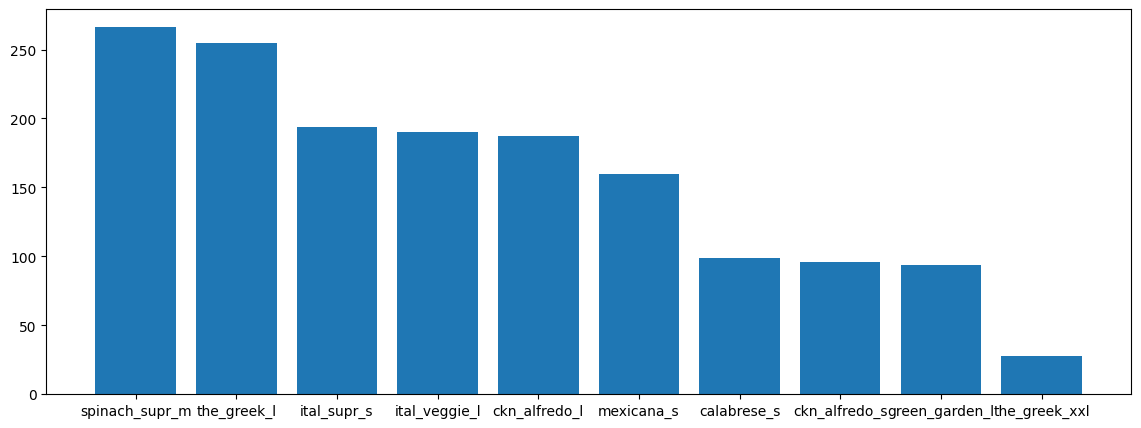

In [20]:
plt.figure(figsize=(14,5))
plt.bar(list(pizza['pizza_name_id'].value_counts()[-10:].keys()),list(pizza['pizza_name_id'].value_counts()[-10:]))
plt.show()

Performance by category

In [46]:
#looking at the types of categories
pizza['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [22]:
#prices by category

category_analysis = pizza.groupby('pizza_category').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_category=('unit_price', lambda x: (x * pizza['quantity']).sum())
).sort_values('revenue_per_category', ascending=False)

print("Average Unit Price and Revenue by Category:\n", category_analysis)


Average Unit Price and Revenue by Category:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


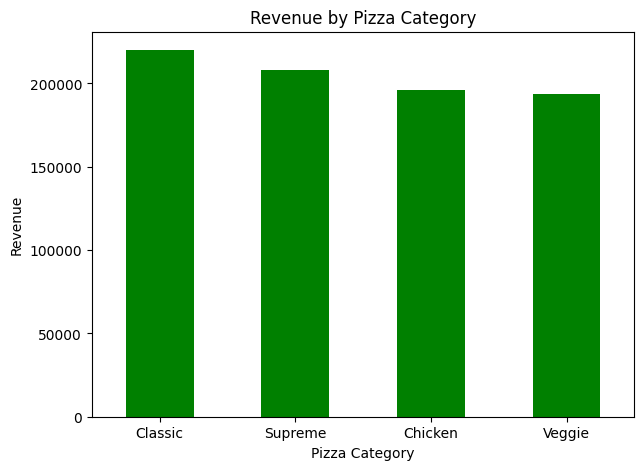

In [23]:
plt.figure(figsize=(7,5))
category_analysis['revenue_per_category'].plot(kind='bar', color='green')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Category')
plt.xticks(rotation=0)
plt.show()

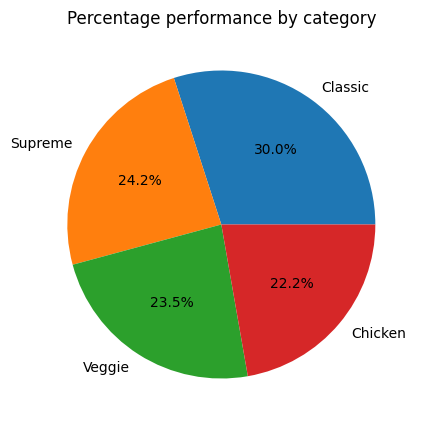

In [24]:
plt.figure(figsize=(5,5))
plt.pie(list(pizza['pizza_category'].value_counts()),labels=list(pizza['pizza_category'].value_counts().keys()),autopct='%0.1f%%')
plt.title("Percentage performance by category")
plt.show()

Performance by Pizza Size

In [25]:
size_analysis = pizza.groupby('pizza_size').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_size=('unit_price', lambda x: (x * pizza['quantity']).sum())
).sort_values(by='revenue_per_size', ascending=False)

print(size_analysis)


            average_unit_price  revenue_per_size
pizza_size                                      
L                    19.802553         375318.70
M                    15.951219         249382.25
S                    12.364328         178076.50
XL                   25.500000          14076.00
XXL                  35.950000           1006.60


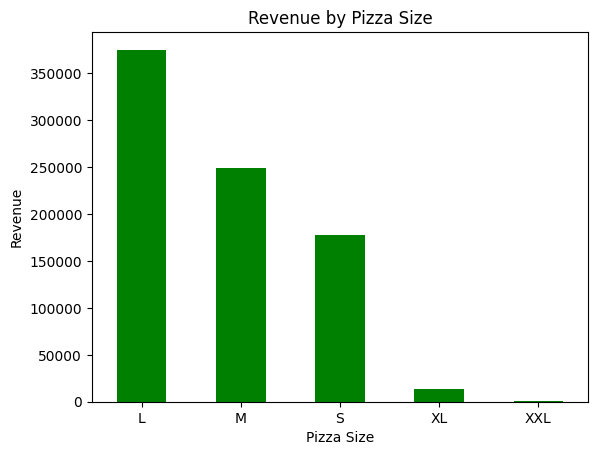

In [70]:
size_analysis['revenue_per_size'].plot(kind='bar', color='green')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Size')
plt.xticks(rotation=0)
plt.show()

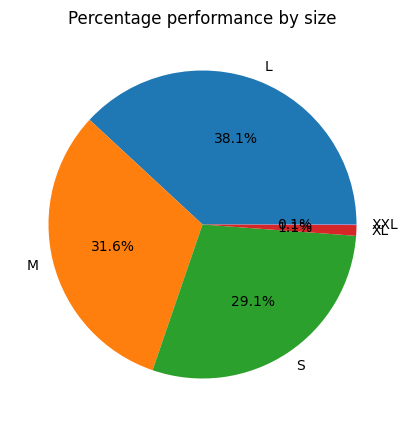

In [71]:
plt.figure(figsize=(5,5))
plt.pie(list(pizza['pizza_size'].value_counts()),labels=list(pizza['pizza_size'].value_counts().keys()),autopct='%0.1f%%')
plt.title("Percentage performance by size")
plt.show()

SEASONAL ANALYSIS OF PIZZA SALES

Performance by day

In [69]:
#convert date of order to day of the week
pizza['day_of_week'] = pd.to_datetime(pizza['order_date'], format='%d-%m-%Y', errors='coerce').dt.strftime('%A')
day_of_week_analysis = pizza.dropna(subset=['day_of_week']).groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Day of Week:\n", day_of_week_analysis)


Highest Number of Orders by Day of Week:
 day_of_week
Friday       4981
Saturday     4349
Thursday     4292
Tuesday      4118
Wednesday    4010
Monday       3904
Sunday       3379
Name: order_id, dtype: int64


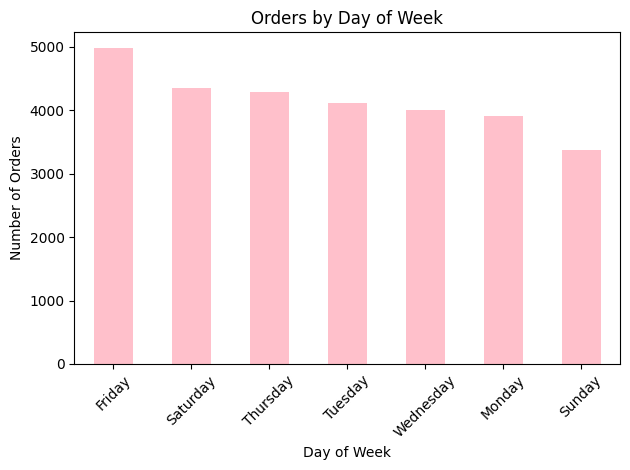

In [52]:
# orders by day of week
day_of_week_analysis.plot(kind='bar', color='pink')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Peak hours for sales of pizza

In [35]:
pizza['delivery_time'] = pizza['order_time'].astype('string').str.slice(0, 5) 
delivery_time_analysis = pizza.groupby('delivery_time')['order_id'].count().nlargest(5)
print("Most Occurring Order Times:\n", delivery_time_analysis)

Most Occurring Order Times:
 delivery_time
13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: order_id, dtype: int64


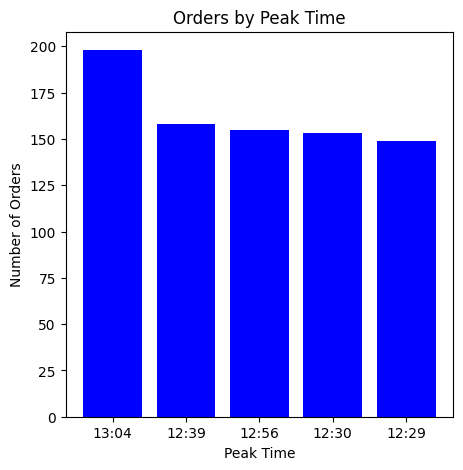

In [36]:
plt.figure(figsize=(5,5))
plt.bar(list(pizza['delivery_time'].value_counts()[0:5].keys()),list(pizza['delivery_time'].value_counts()[0:5]),color=["blue"])
plt.xlabel('Peak Time')
plt.ylabel('Number of Orders')
plt.title('Orders by Peak Time')
plt.show()

Distribution of revenue in sales of pizza per month

In [76]:
pizza['month'] = pd.to_datetime(pizza['order_date'], format='%d-%m-%Y', errors='coerce').dt.strftime('%B')
month_analysis = pizza.dropna(subset=['month']).groupby('month')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Month:\n", month_analysis)


Highest Number of Orders by Month:
 month
March        2591
May          2581
November     2571
July         2565
January      2506
August       2495
October      2444
April        2409
June         2371
February     2197
December     2179
September    2124
Name: order_id, dtype: int64


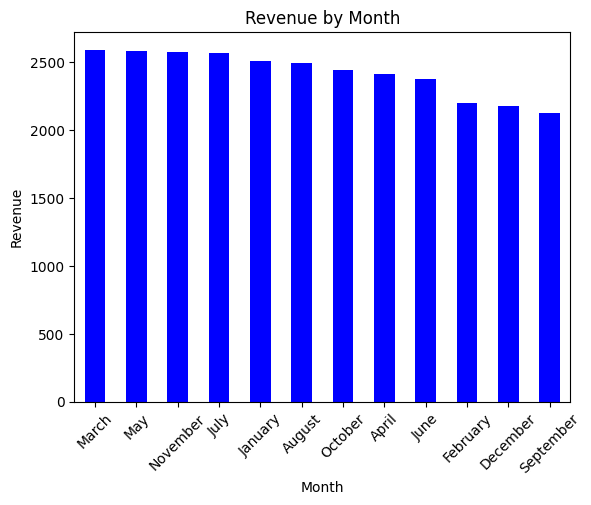

In [77]:
# Renvenue by month
month_analysis.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.xticks(rotation=45)
plt.show()

CUSTOMER BEHAVIOUR

In [60]:
#Most preffered pizza
favorite_pizza = pizza.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Favorite Pizza:", favorite_pizza)

Favorite Pizza: ('The Big Meat Pizza', 'S')


In [62]:
# top 5 ordered pizzas
most_ordered_pizza = pizza.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(5, 'order_count')
print("Most Ordered Pizzas:\n", most_ordered_pizza)

Most Ordered Pizzas:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194
The Pepperoni Pizza                2369           12.468658
The Thai Chicken Pizza             2315           18.286069


In [63]:
#most reffered by size
most_ordered_pizza_size = pizza.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(3, 'order_count')
print("Most Ordered Pizzas:\n", most_ordered_pizza_size)

Most Ordered Pizzas:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553
M                 15385           15.951219
S                 14137           12.364328


In [64]:
#prefference by category
prefered_pizza_category = pizza.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(5, 'order_count')
print("Most Ordered Pizzas:\n", prefered_pizza_category)

Most Ordered Pizzas:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579           14.797490
Supreme               11777           17.363229
Veggie                11449           16.612639
Chicken               10815           17.709408


In [67]:
#by prices
max_priced_pizza = pizza[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Lowest Priced Pizza:\n", max_priced_pizza)


Lowest Priced Pizza:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


In [68]:
#lowest price
lowest_priced_pizza = pizza[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Lowest Priced Pizza:\n", lowest_priced_pizza)

Lowest Priced Pizza:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object
